<a href="https://colab.research.google.com/github/Radhikakhot66-VCTI/Python_libraries/blob/Pavan/L8_SpatialJoins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [9]:
states = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/GeoPandas/files/stateFiles/ne_110m_admin_1_states_provinces.shp")

In [10]:
india_states = states[states['admin'] == 'India']

In [11]:
data = {
    'City': ['Mumbai', 'Delhi', 'Bangalore', 'Kolkata'],
    'Latitude': [19.0760, 28.6139, 12.9716, 22.5726],
    'Longitude': [72.8777, 77.2090, 77.5946, 88.3639]
}
cities_df = pd.DataFrame(data)
cities_df['geometry'] = [Point(xy) for xy in zip(cities_df['Longitude'], cities_df['Latitude'])]
cities = gpd.GeoDataFrame(cities_df, geometry='geometry', crs='EPSG:4326')

In [12]:
india_states = india_states.to_crs(cities.crs)
cities_with_states = gpd.sjoin(cities, india_states, how='left', predicate='within')

In [13]:
print(cities_with_states[['City', 'name', 'name_local']])

        City name name_local
0     Mumbai  NaN        NaN
1      Delhi  NaN        NaN
2  Bangalore  NaN        NaN
3    Kolkata  NaN        NaN


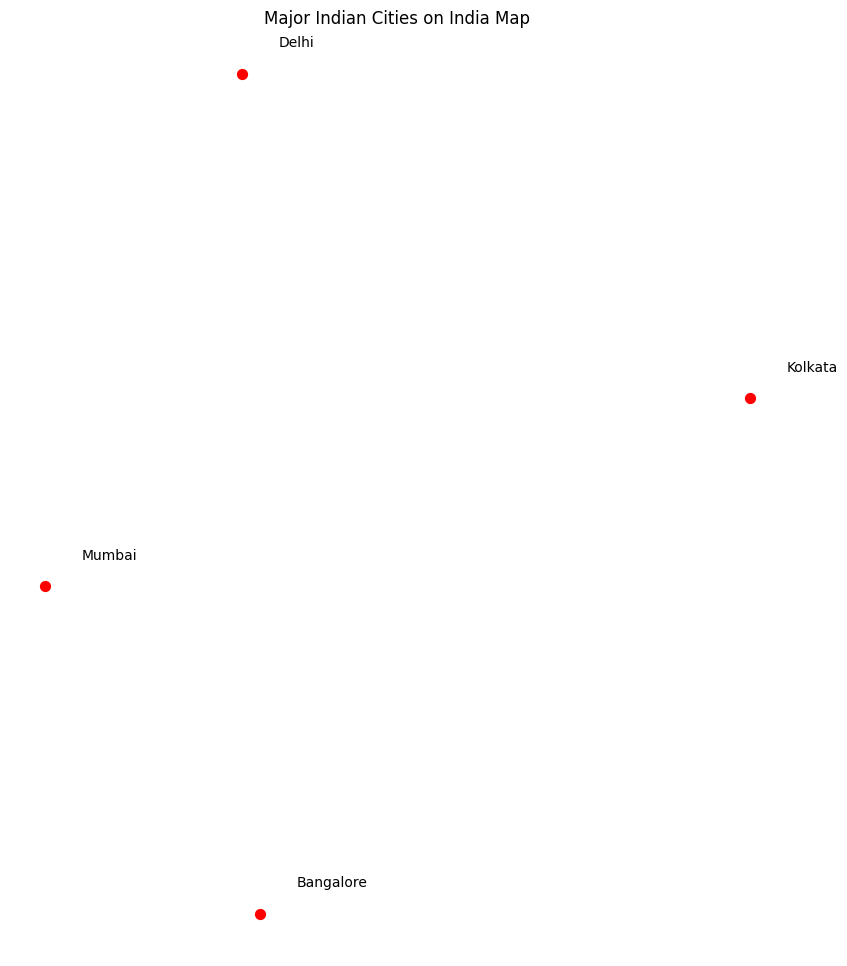

In [17]:
fig, ax = plt.subplots(figsize=(10, 12))

# Only plot if data is not empty
if not india_states.empty:
    india_states.boundary.plot(ax=ax, color='gray')

if not cities.empty:
    cities.plot(ax=ax, color='red', markersize=50)

    # Add labels
    for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities['City']):
        ax.text(x + 0.8, y + 0.5, label, fontsize=10)

ax.set_title("Major Indian Cities on India Map")
ax.set_aspect('auto')
plt.axis("off")
plt.show()
